In [1]:
#### In this notebook I obtain the branching ratio for the processes zp -> chi chi, 
#### y0 -> chi chi, and h2 -> chi chi, and store the results in a dataframe that
#### contains the mediator mass, and the branching ratios

import sys,os,glob,copy
sys.path.append('../')
import numpy as np
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d
import scipy
import matplotlib as mpl
import sympy as sp
from matplotlib.colors import LogNorm



plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
BRdata = pd.DataFrame(columns=['Mediator', '$m_{med}$', '$g_{q}$', '$\sin\\alpha$', '$m_{DM}$', 
                               '$g_{\chi}$', '$y_{\chi}$', '$BR(med>\chi\chi)$', 'Width'])

In [3]:
m = np.random.uniform(1000.0, 4000.0, 300)
Mchi = np.random.uniform(65.0, m/2, 300)

In [4]:
## spin 1 mediator ##

# mediator mass
mzp = np.random.uniform(1000.0, 4000.0, 300)

# quarks masses
MU = 0
MC = 0
MT = 0
MD = 0
MS = 0
MB = 0

# DM mass
Mchi = np.random.uniform(65.0, mzp/2, 300)

# couplings
gqV = 0.15
gchi = 5
gqA = 0.0
gZp = 1.0


In [5]:
for i, m in enumerate(mzp):
    gqL = (gqA + gqV)
    gqR = (-gqA + gqV)

    # Zp to t 
    if m < 2*MT:
        ZPtt = 0
    else:

        ZPtt = ((-6*gqL**2*gZp**2*MT**2 + 36*gqL*gqR*gZp**2*MT**2 - 6*gqR**2*gZp**2*MT**2 
                 + 6*gqL**2*gZp**2*m**2 + 6*gqR**2*gZp**2*m**2)
                *np.sqrt(-4*MT**2*m**2 + m**4))/(48.*np.pi*abs(m)**3)            

    # Zp to u
    ZPuu = (m**2*(6*gqL**2*gZp**2*m**2 + 6*gqR**2*gZp**2*m**2))/(48.*np.pi*abs(m)**3)

    # Zp to c
    ZPcc = (m**2*(6*gqL**2*gZp**2*m**2 + 6*gqR**2*gZp**2*m**2))/(48.*np.pi*abs(m)**3)

    # Zp to d
    ZPdd = (m**2*(6*gqL**2*gZp**2*m**2 + 6*gqR**2*gZp**2*m**2))/(48.*np.pi*abs(m)**3)

    # Zp to s
    ZPss = (m**2*(6*gqL**2*gZp**2*m**2 + 6*gqR**2*gZp**2*m**2))/(48.*np.pi*abs(m)**3)

    # Zp to b
    ZPbb = (m**2*(6*gqL**2*gZp**2*m**2 + 6*gqR**2*gZp**2*m**2))/(48.*np.pi*abs(m)**3)

    # Zp to DM
    ZPchichi = ((-16*gchi**2*Mchi[i]**2 + 4*gchi**2*m**2)
                *np.sqrt(-4*Mchi[i]**2*m**2 + m**4))/(96.*np.pi*abs(m)**3)

    # Zp total width
    GammaZP = ZPuu + ZPcc + ZPtt + ZPdd + ZPss + ZPbb + ZPchichi

    # BR(Zp to DM)
    BR_ZPchichi = ZPchichi / GammaZP

    # BR(Zp to quarks)
    BR_ZPqq = (ZPuu + ZPcc + ZPtt + ZPdd + ZPss + ZPbb)/GammaZP

    BRdata.loc[len(BRdata)] = ['spin-1', m, gqV, np.nan, Mchi[i], gchi, np.nan, BR_ZPchichi, GammaZP]

In [6]:
BRdata

,Mediator,$m_{med}$,$g_{q}$,$\sin\alpha$,$m_{DM}$,$g_{\chi}$,$y_{\chi}$,$BR(med>\chi\chi)$,Width
0,spin-1,2607.021157,0.15,NaN,120.738238,5,NaN,0.968222,881.323949
1,spin-1,1177.904465,0.15,NaN,291.927666,5,NaN,0.952874,268.520044
2,spin-1,2601.609484,0.15,NaN,281.148911,5,NaN,0.966361,830.838359
3,spin-1,1439.762308,0.15,NaN,561.498046,5,NaN,0.883232,132.462247
4,spin-1,2517.171078,0.15,NaN,1010.477585,5,NaN,0.867363,203.879343
...,...,...,...,...,...,...,...,...,...
295,spin-1,3824.256392,0.15,NaN,113.928409,5,NaN,0.968454,1302.356987
296,spin-1,3831.330578,0.15,NaN,1818.783667,5,NaN,0.488603,80.485079
297,spin-1,3879.990117,0.15,NaN,1791.294090,5,NaN,0.635977,114.505260
298,spin-1,3248.578196,0.15,NaN,1009.687683,5,NaN,0.936847,552.614019


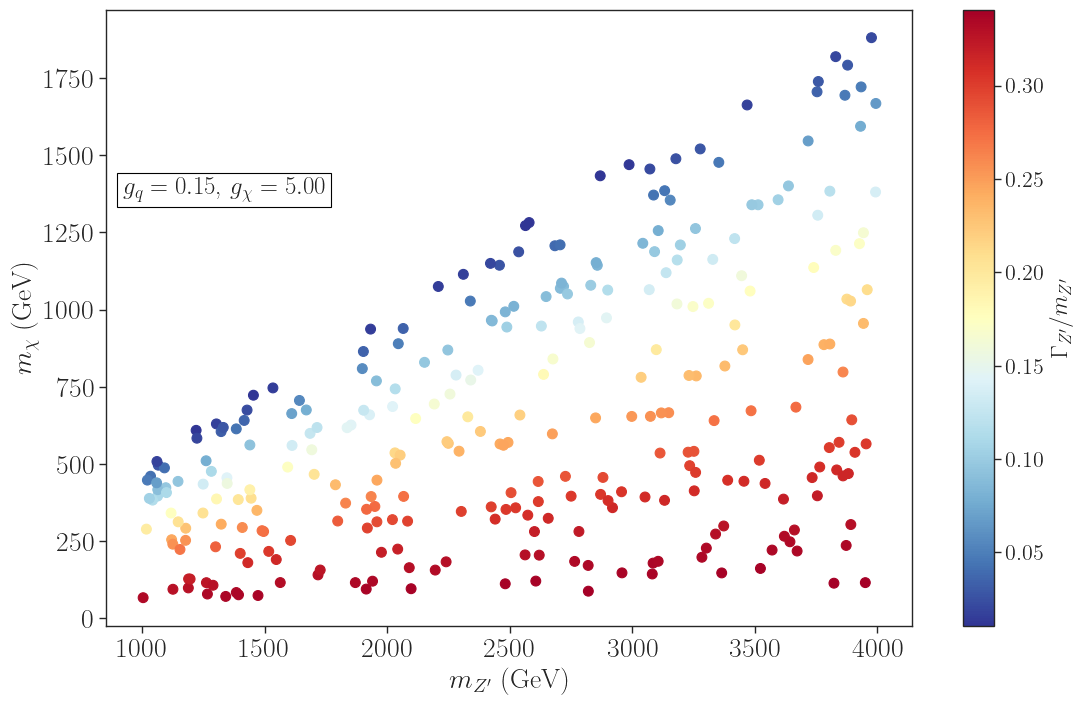

In [10]:
cm = plt.cm.get_cmap('RdYlBu_r')
plt.figure(figsize=(13,8))

gqv = 0.15
gchi = 5.0

x = BRdata['$m_{med}$']
y = BRdata['$m_{DM}$']
c = BRdata['Width']/BRdata['$m_{med}$']

plt.scatter(x,y,c=c,s=50,cmap=cm)
plt.colorbar(label=r'$\Gamma_{Z^{\prime}} / m_{Z^{\prime}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)', fontsize=20)
plt.ylabel(r'$m_{\chi}$ (GeV)', fontsize=20)
plt.text(0.02,0.7,r'$g_{q} = %1.2f$, $g_{\chi} = %1.2f$' % (gqv, gchi),fontsize=18,
         bbox=dict(facecolor='white', edgecolor='black'),transform = plt.gca().transAxes)

# plt.savefig('ratio_wm_2mdm_rescaled.png')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

In [6]:
## spin-0 mediator ##

# mediator mass
MSd = np.arange(140, 1600, 10)

# quarks masses
MT = 172

# tau lepton mass
MTA = 1.777

# DM mass
Mchi = 65.0

# gauge bosons masses
MW = 79.824
MZ = 91.1876
MZp = 2000.0

# higgs boson mass
MH = 125.0

aEWM1 = 127.9
aEW = 1/aEWM1
ee = 2*np.sqrt(aEW)*np.sqrt(np.pi)

sw2 = 1 - MW**2/MZ**2
sw = np.sqrt(sw2)
cw = np.sqrt(1 - sw2)

# vevs
vev = (2*MW*sw)/ee
gchi = 1.0
vev2 = MZp/(2*gchi)

# couplings
ychi = np.array([0.1, 0.5, 1.0, 1.5, 2.0])
yt = np.sqrt(2)*MT/vev
ytau = np.sqrt(2)*MTA/vev
Sa = np.array([0.1, 0.2, 0.25])


In [7]:
for s in Sa:
    for y in ychi:
        for m in MSd:
            Ca = np.sqrt(1-s**2)
            lam1 = (Ca**2*MH**2)/(2.*vev**2) + (m**2*s**2)/(2.*vev**2)
            lam2 = (Ca**2*m**2)/(2.*vev2**2) + (MH**2*s**2)/(2.*vev2**2)
            lam3 = (Ca*(-MH**2 + m**2)*s)/(vev*vev2)

            # S to Higgs
            if m < 2* MH:
                Shh = 0
            else:
                Shh = ((36*Ca**4*lam1**2*s**2*vev**2 - 24*Ca**4*lam1*lam3*s**2*vev**2 + 4*Ca**4*lam3**2*s**2*vev**2 
                        + 12*Ca**2*lam1*lam3*s**4*vev**2 - 4*Ca**2*lam3**2*s**4*vev**2 + lam3**2*s**6*vev**2 
                        + 12*Ca**5*lam1*lam3*s*vev*vev2 - 4*Ca**5*lam3**2*s*vev*vev2 + 72*Ca**3*lam1*lam2*s**3*vev*vev2 
                        - 24*Ca**3*lam1*lam3*s**3*vev*vev2 - 24*Ca**3*lam2*lam3*s**3*vev*vev2 + 10*Ca**3*lam3**2*s**3*vev*vev2 
                        + 12*Ca*lam2*lam3*s**5*vev*vev2 - 4*Ca*lam3**2*s**5*vev*vev2 + Ca**6*lam3**2*vev2**2 
                        + 12*Ca**4*lam2*lam3*s**2*vev2**2 - 4*Ca**4*lam3**2*s**2*vev2**2 + 36*Ca**2*lam2**2*s**4*vev2**2 
                        - 24*Ca**2*lam2*lam3*s**4*vev2**2 + 4*Ca**2*lam3**2*s**4*vev2**2)
                       *np.sqrt(-4*MH**2*m**2 + m**4))/(32.*np.pi*abs(m)**3)

            # S to DM
            Schichi = ((-4*Ca**2*Mchi**2*y**2 + Ca**2*m**2*y**2)
                       *np.sqrt(-4*Mchi**2*m**2 + m**4))/(32.*np.pi*abs(m)**3)

            # S to tau
            Stautau = ((m**2*s**2*ytau**2 - 4*MTA**2*s**2*ytau**2)
                       *np.sqrt(m**4 - 4*m**2*MTA**2))/(16.*np.pi*abs(m)**3)

            # S to top
            if m < 2*MT:
                Stt = 0
            else:
                Stt = ((3*m**2*s**2*yt**2 - 12*MT**2*s**2*yt**2)
                       *np.sqrt(m**4 - 4*m**2*MT**2))/(16.*np.pi*abs(m)**3)

            # S to W
            if m < 2*MW:
                Sww = 0
            else:
                Sww = (((3*ee**4*s**2*vev**2)/(4.*sw**4) + (ee**4*m**4*s**2*vev**2)/(16.*MW**4*sw**4) 
                        - (ee**4*m**2*s**2*vev**2)/(4.*MW**2*sw**4))
                       *np.sqrt(m**4 - 4*m**2*MW**2))/(16.*np.pi*abs(m)**3)

            # S to Z
            if m < 2*MZ:
                Szz = 0
            else:
                Szz = (((9*ee**4*s**2*vev**2)/2. + (3*ee**4*m**4*s**2*vev**2)
                        /(8.*MZ**4) - (3*ee**4*m**2*s**2*vev**2)/(2.*MZ**2) 
                        + (3*cw**4*ee**4*s**2*vev**2)/(4.*sw**4) + (cw**4*ee**4*m**4*s**2*vev**2)
                        /(16.*MZ**4*sw**4) - (cw**4*ee**4*m**2*s**2*vev**2)
                        /(4.*MZ**2*sw**4) + (3*cw**2*ee**4*s**2*vev**2)/sw**2 
                        + (cw**2*ee**4*m**4*s**2*vev**2)/(4.*MZ**4*sw**2) 
                        - (cw**2*ee**4*m**2*s**2*vev**2)/(MZ**2*sw**2) + (3*ee**4*s**2*sw**2*vev**2)/cw**2 
                        + (ee**4*m**4*s**2*sw**2*vev**2)/(4.*cw**2*MZ**4) - (ee**4*m**2*s**2*sw**2*vev**2)/(cw**2*MZ**2) 
                        + (3*ee**4*s**2*sw**4*vev**2)/(4.*cw**4) + (ee**4*m**4*s**2*sw**4*vev**2)/(16.*cw**4*MZ**4) 
                        - (ee**4*m**2*s**2*sw**4*vev**2)/(4.*cw**4*MZ**2))
                       *np.sqrt(m**4 - 4*m**2*MZ**2))/(32.*np.pi*abs(m)**3)


            #  S Total width
            GammaS = Shh + Schichi + Stautau + Stt + Sww + Szz

            # BR(S to DM)
            BR_Schichi = Schichi / GammaS
            
            BRdata.loc[len(BRdata)] = ['spin-0', m, np.nan, s, np.nan, y, BR_Schichi]

In [8]:
BRdata

,Mediator,$m_{med}$,$g_{q}$,$\sin\alpha$,$g_{\chi}$,$y_{\chi}$,$BR(med>\chi\chi)$
0,spin-1,140,0.01,NaN,0.1,NaN,0.145612
1,spin-1,150,0.01,NaN,0.1,NaN,0.292732
2,spin-1,160,0.01,NaN,0.1,NaN,0.397730
3,spin-1,170,0.01,NaN,0.1,NaN,0.471424
4,spin-1,180,0.01,NaN,0.1,NaN,0.524479
...,...,...,...,...,...,...,...
7925,spin-0,1550,NaN,0.25,NaN,2.0,0.268006
7926,spin-0,1560,NaN,0.25,NaN,2.0,0.265570
7927,spin-0,1570,NaN,0.25,NaN,2.0,0.263163
7928,spin-0,1580,NaN,0.25,NaN,2.0,0.260784


In [9]:
BRdata.to_pickle('../data/BRdata.pcl')